### Extraterrestrial Model

The search for alien signals requires a model for us to plan our detections. In this project, my signal is:
1. Broadband, since the aliens do not know our observing window
2. -200<DM<0 : this is our hypothesis, that the aliens can generate signals such that when they traverse over the galaxy, they will retain a negative DM, and that a negative DM is a sign of artificiality.
3. Gaussian, i.e. no scattering
4. Flat, i.e. spectral index of 0

### Pipeline Summary

The pipeline for searching alien signals involves the following steps:

1. **Data Import and Preprocessing**:
    - Load and downsample data from sky, injected signal, and alien signal files.
    - Normalize the data and apply frequency masks to remove unwanted frequency ranges.

2. **Sky Data Analysis**:
    - Perform Gaussian fitting on the normalized sky data to extract statistical properties of the background for each dm, width pair. 
    - Visualize the results using timeseries plots, histograms, and heatmaps.

3. **Find Injected and Alienc Signals**:
    - Conduct Gaussian template searches on the normalized  data.
    - Identify candidates by comparing correlation values against sky noise statistics.
    - Identify DM, width using a heatmap to visualize the clustering of all candidate in DM, width space.
    - Verify by plotting timeseries

5. **Calibration of Alien Signal**:
    - Apply a transfer function to calibrate the dedispersed alien signal data.
    - Compute peak flux and fluence.

### Result
We find an alien signal at a DM of -14(1) with peak flux of ~3.8 Jy and fluence of 0.43 Jy-ms within the CHIME band of 400-800 MHz. Since the DM is negative, we cannot place a distance constraint on the source. 

### Discussion

1. In our candidate selection criteria, we set the correlation threshold using blank sky data to to account for false positives. Here we have assumed that the blank sky statistics are stationary and gaussian (due to the presence of "box" like faint signals), which are both not quite true (see figure 2.2 for example). 
2. In figure 2.3 we see that the correlation strength of the blank sky with a gaussian template is high (by a factor of 4-5) in the low DM, high width regime, which means that our sensitivity in that parameter space is low and our candidate identification will suffer.
3. In section 3.3 we see that the mean correlation in our background and injection sample are not quite 1:1 which could be a potential source of error. 
4. Because of these issues, and lack of robust correlation methods and metrics (such as accounting for RFI), we use a clustering in "Detection SNR" space to identify real events, instead of using the metric itself. Note that detection SNR is just a metric based on correlation strenghts between the sample and our data for given (DM, width, reference time) vector. 
5. We find the injected pulse, with known parameters, using the method described above and validate the pipeline. 
6. Running the same pipeline on "alien" data, we see that our pipeline identifies a pulse of -14+-1 DM and width of 10ms. This raises a flag that our pipeline is not as robust as expected because using the timeseries we see that the width of the pulse is ~100ms. 
7. There could be multiple reasons for this - our template fitting is not well calibrated and does not properly weight widths, the strength of correlations in sky data bias our pipeline against high widths and low DMs (see figure 2.3, and 4.4 shows that for the data, hogh widths actually have the strongest correlations), and finally, that there could be a bug identifying the real DM, width.




# 1. Import data

In [1]:
from functions import *

## 1.1 Sky 

Output()

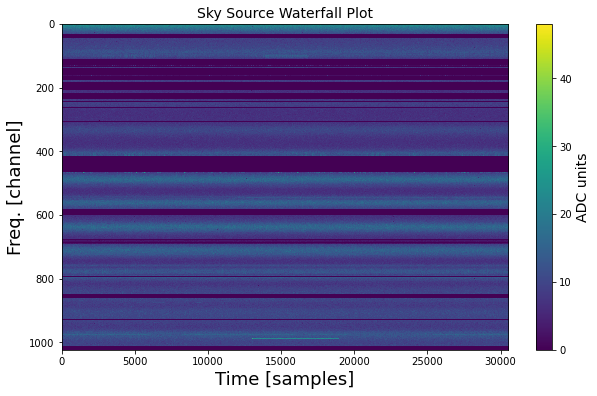

Output()

Output()

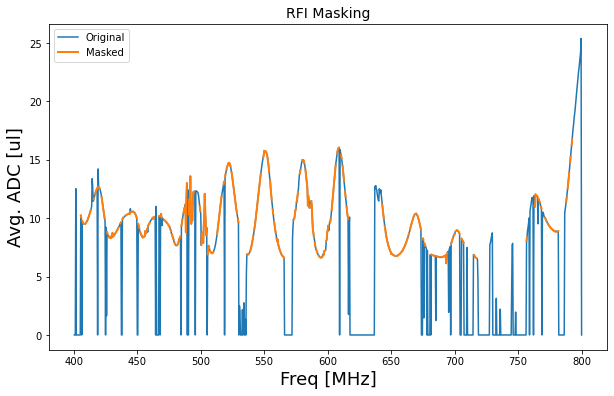

Output()

Output()

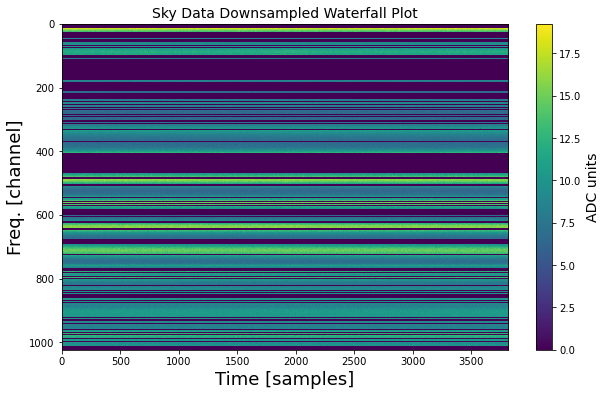

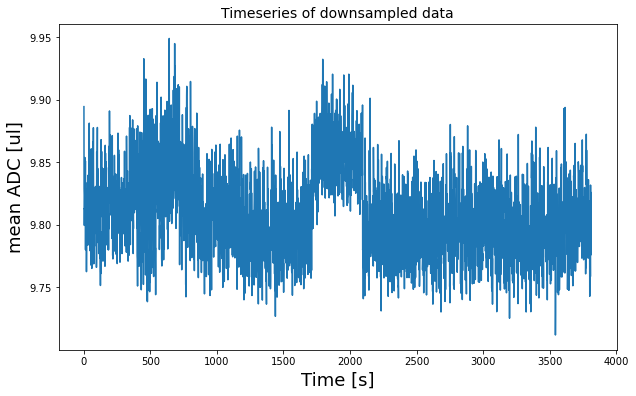

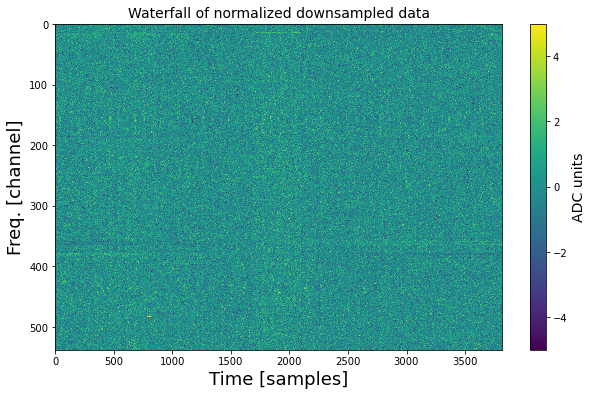

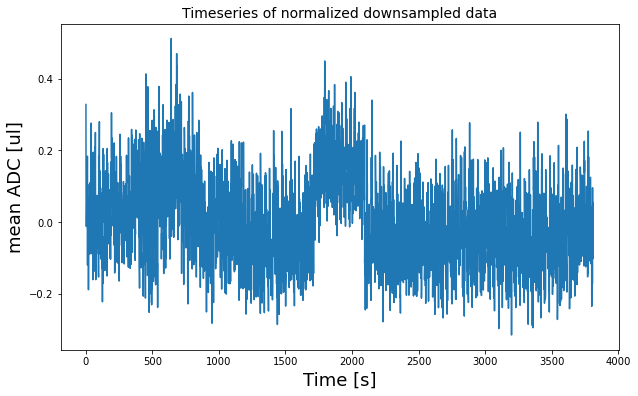

In [2]:
sky_32, sky_data_32, sky_freq_mask = read_and_downsize_data(
    "./data/blank_sky.fil", 
    tfactor=tfactor,
    object_type="Sky", 
)

# Timeseries of downsampled data
plot_timeseries(sky_data_32.data, sky_freq_mask, title="Timeseries of downsampled data")

sky_normalized = sky_data_32.normalise()
sky_normalized_array = sky_normalized.data
sky_freq_mask[50:120] = True
sky_freq_mask[400:420] = True

# Plot the waterfall
plot_waterfall(sky_normalized_array, sky_freq_mask, title="Waterfall of normalized downsampled data", vmin=-5, vmax=5)
plot_timeseries(sky_normalized_array, sky_freq_mask, title="Timeseries of normalized downsampled data")

## 1.2 Injected Signal

Output()

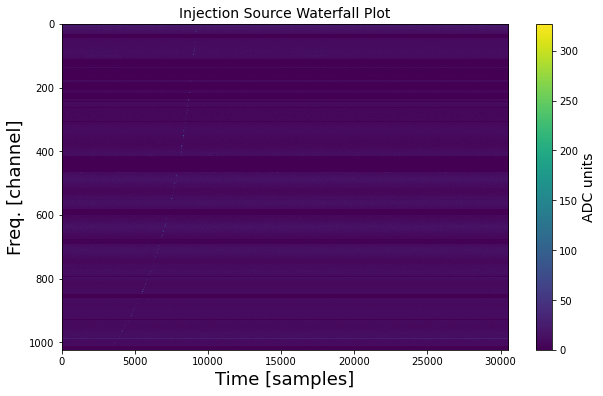

Output()

Output()

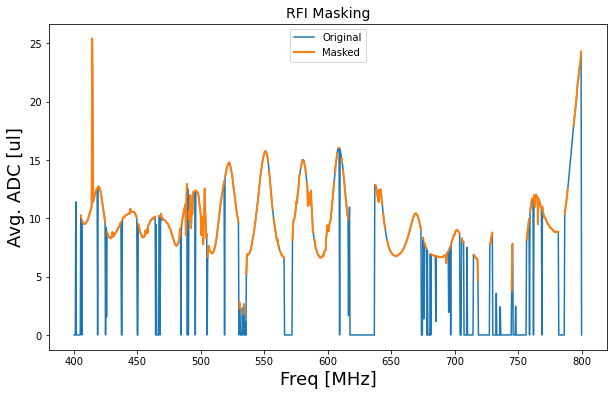

Output()

Output()

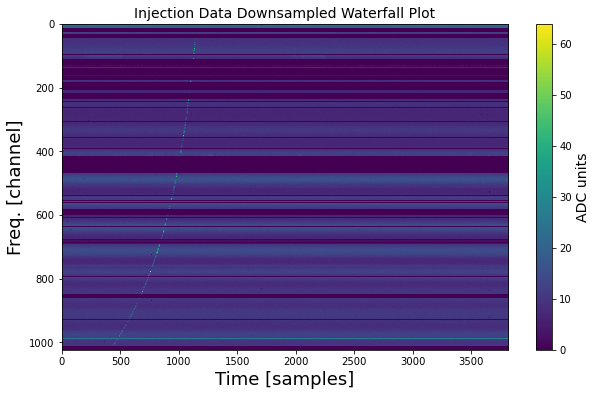

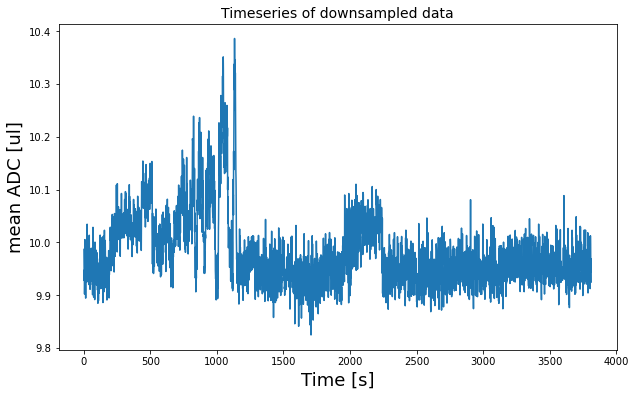

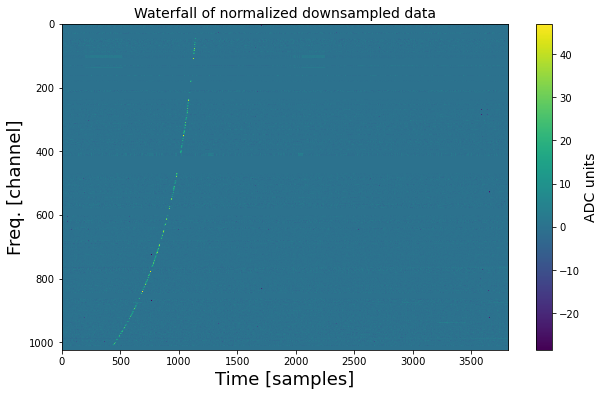

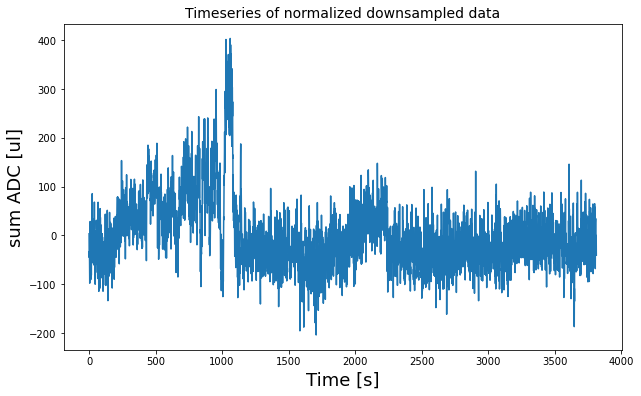

In [3]:
inj_32, inj_data_32, inj_freq_mask = read_and_downsize_data(
    "./data/data_w_injected_signal.fil", 
    tfactor=tfactor,
    object_type="Injection", 
)

# Timeseries of downsampled data
plot_timeseries(inj_data_32.data, inj_freq_mask, title="Timeseries of downsampled data")

# Normalization
inj_normalized = inj_data_32.normalise()
inj_normalized_array = inj_normalized.data

inj_normalized = inj_data_32.normalise()
inj_normalized_array = inj_normalized.data
inj_freq_mask[50:120] = True
inj_freq_mask[400:420] = True

# Plot the waterfall
plot_waterfall(inj_normalized_array, title="Waterfall of normalized downsampled data")
plot_timeseries(inj_normalized_array, inj_freq_mask, type="sum", title="Timeseries of normalized downsampled data")

## 1.3 Alien Signal

Output()

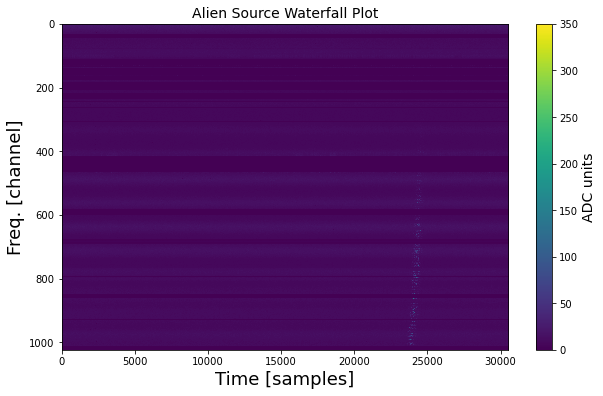

Output()

Output()

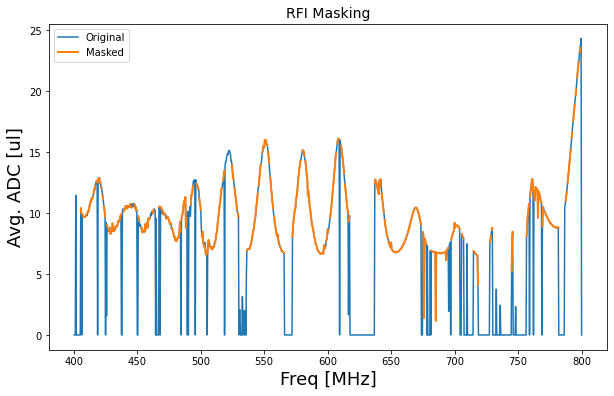

Output()

Output()

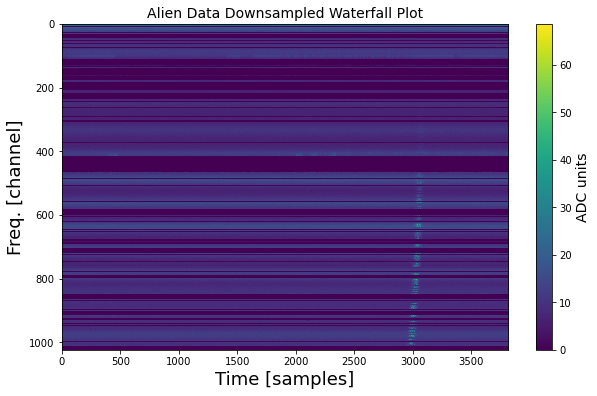

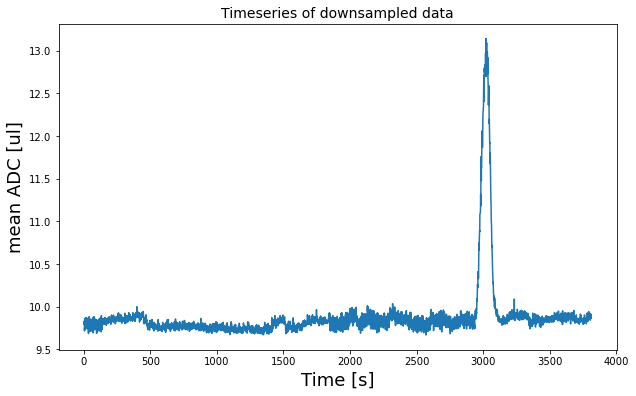

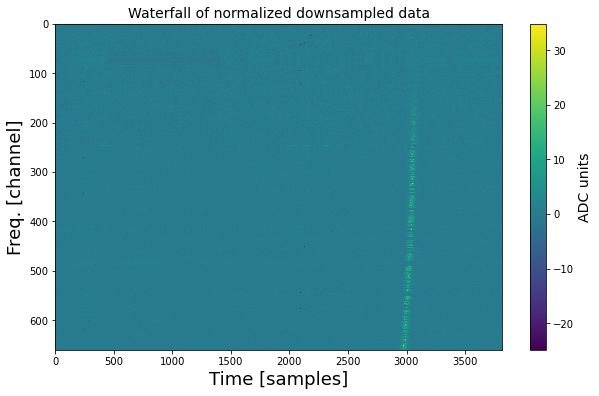

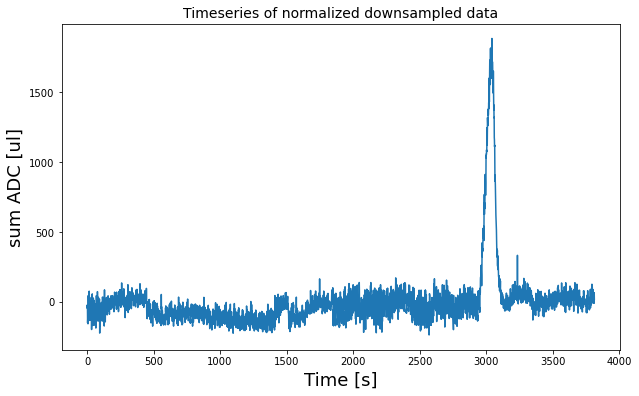

In [4]:
alien_32, alien_data_32, alien_freq_mask = read_and_downsize_data(
    "./data/data_261146047.fil", 
    tfactor=tfactor,
    object_type="Alien",
)

# Timeseries of downsampled data
plot_timeseries(alien_data_32.data, alien_freq_mask, title="Timeseries of downsampled data")

# Normalization
aln_normalized = alien_data_32.normalise()
aln_normalized_array = aln_normalized.data
alien_freq_mask[405:415] = True

# Plot the waterfall
plot_waterfall(aln_normalized_array, alien_freq_mask, title="Waterfall of normalized downsampled data")
plot_timeseries(aln_normalized_array, alien_freq_mask, "sum", title="Timeseries of normalized downsampled data")

# 2. Process Sky data

In [5]:
print(f"Width of a DM bin: {dm_bin_width}")

Width of a DM bin: 0.9798994974874233


## 2.1 Gaussian Search

In [6]:
sky_stats = gaussian_fit(sky_normalized, sky_freq_mask, dm_range, width_range)

In [7]:
print(sky_stats[list(sky_stats.keys())[0]].keys())

dict_keys(['midtimes', 'corr'])


## 2.2 Get Sky Statistics

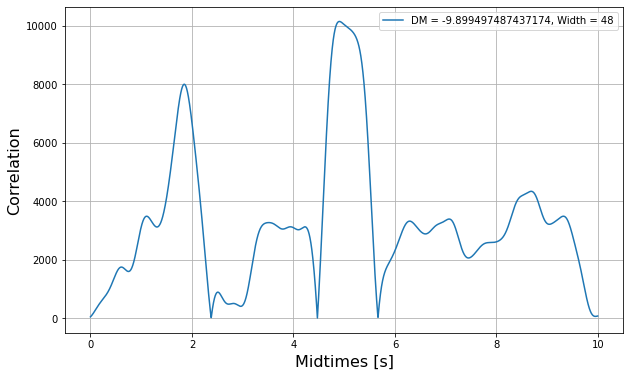

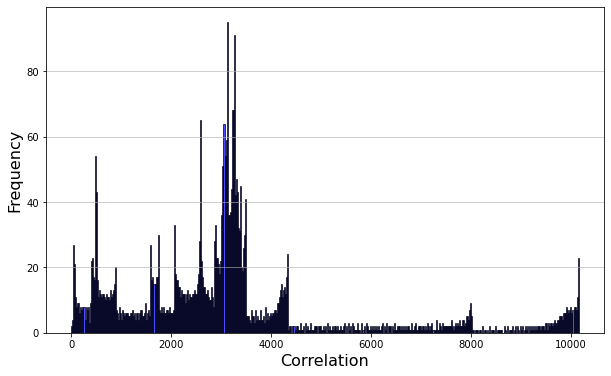

In [8]:
# Select a random DM and width from the results keys
random_dm, random_width = random.choice(list(sky_stats.keys()))

# Extract the correlation and midtimes for the selected DM and width
random_corr = sky_stats[(random_dm, random_width)]['corr']
random_midtimes = sky_stats[(random_dm, random_width)]['midtimes']

# Plot the correlation against midtimes
plt.figure(figsize=(10, 6))
plt.plot(random_midtimes, random_corr, label=f'DM = {random_dm}, Width = {random_width}')
plt.xlabel('Midtimes [s]', fontsize=16)
plt.ylabel('Correlation', fontsize=16)
plt.legend()
plt.grid()
plt.show()

# Plot a histogram of the correlation values
plt.figure(figsize=(10, 6))
plt.hist(random_corr, bins=500, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Correlation', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
# plt.title('Histogram of Correlation Values', fontsize=16)
plt.grid(axis='y', alpha=0.75)
plt.show()

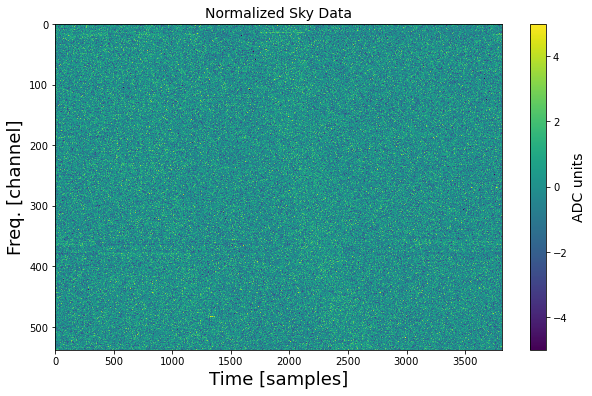

In [9]:
# Plot the waterfall of the selected DM and width
plot_waterfall(sky_normalized.dedisperse(-91.).data, sky_freq_mask, title="Normalized Sky Data", vmin=-5, vmax=5)

In [10]:
# Update the results dictionary with max and mean of corr for each (dm, width) pair
for (dm, width), data in sky_stats.items():
    corr = data['corr']
    sky_stats[(dm, width)]['max_noise'] = np.max(corr)
    sky_stats[(dm, width)]['mean_noise'] = np.mean(corr)
    sky_stats[(dm, width)]['median_noise'] = np.median(corr)

## 2.3 Maximizing DM and Width

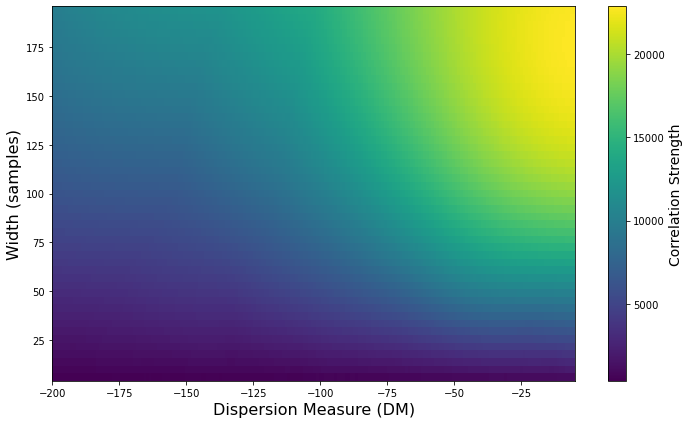

In [45]:
# Find the best DM (and corresponding data) that maximizes SNR
plot_heatmap(sky_stats, "max_noise")

# 3. Search for Injected Signal

## 3.1 Gaussian Search

In [13]:
# Compute the Gaussian fit
inj_results = gaussian_fit(inj_normalized, inj_freq_mask, dm_range, width_range)

## 3.2 Boxcart Search

In [14]:
# results = boxcart_fit(inj_32, inj_data_32, inj_freq_mask, dm_range, width_range, baseline, noise_std)

## 3.3 Maximizing DM and Width

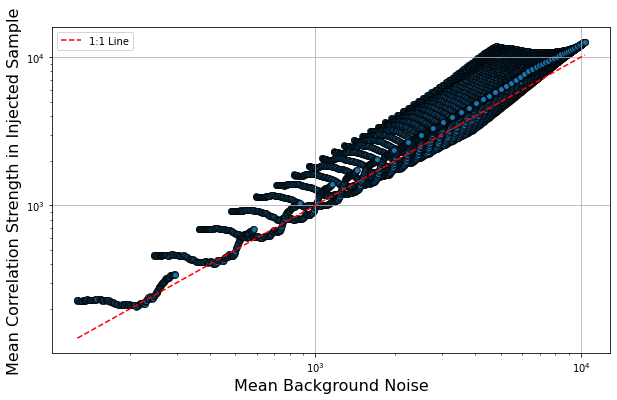

In [16]:
for (dm, width), data in inj_results.items():
    corr = data['corr']
    inj_results[(dm, width)]['max_corr'] = np.max(corr)
    inj_results[(dm, width)]['mean_corr'] = np.mean(corr)
    inj_results[(dm, width)]['median_corr'] = np.median(corr)

# Extract mean_corr and mean_noise for each (dm, width) pair
mean_corr_values = [data['median_corr'] for (dm, width), data in inj_results.items()]
mean_noise_values = [data['mean_noise'] for (dm, width), data in sky_stats.items()]

# Plot mean_corr vs mean_noise
plt.figure(figsize=(10, 6))
plt.scatter(mean_noise_values, mean_corr_values, alpha=0.7, edgecolor='k')
plt.plot([min(mean_noise_values), max(mean_noise_values)], 
         [min(mean_noise_values), max(mean_noise_values)], 
         color='red', linestyle='--', label='1:1 Line')
plt.legend()
plt.xlabel('Mean Background Noise', fontsize=16)
plt.ylabel('Mean Correlation Strength in Injected Sample', fontsize=16)
# plt.title('Mean Correlation vs Mean Noise', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

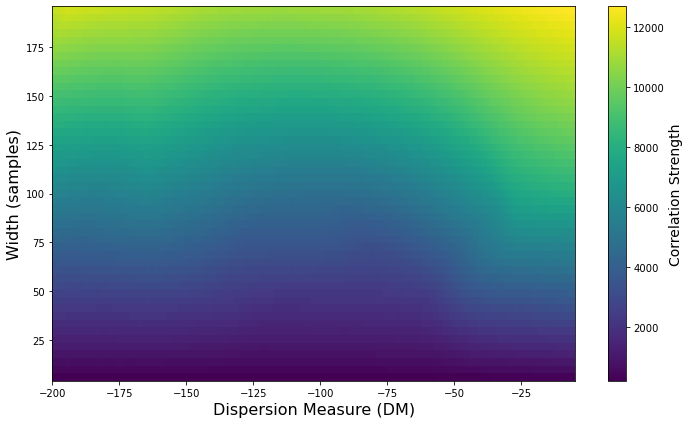

In [47]:
plot_heatmap(inj_results, "median_corr")

## 3.4 Find Candidates

In [17]:
candidates = {}

for (dm, width), data in inj_results.items():
    corr = data['corr']
    max_noise = sky_stats.get((dm, width), {}).get('max_noise', None)
    median_noise = sky_stats.get((dm, width), {}).get('median_noise', None)
    
    if max_noise is not None:
        candidate_indices = np.where(corr > max_noise)[0]
        if len(candidate_indices) > 0:
            candidates[(dm, width)] = {
                'indices': candidate_indices,
                'midtimes': data['midtimes'][candidate_indices],
                'corr_values': corr[candidate_indices],
                'snr': corr[candidate_indices] / median_noise,
            }

print(f"Found {len(candidates)} candidate(s).")

Found 9800 candidate(s).


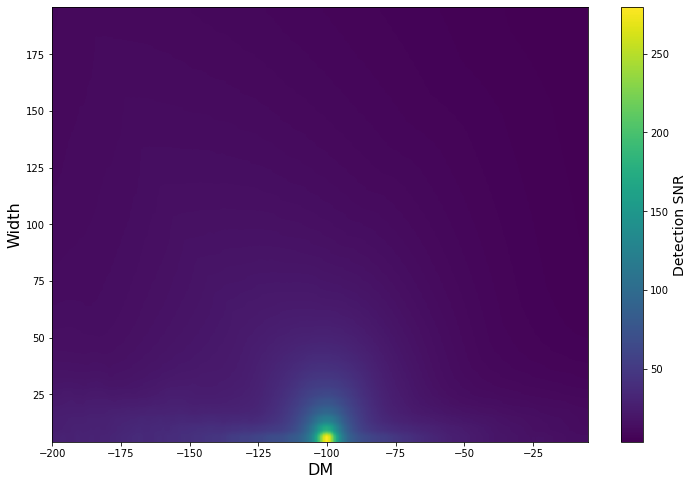

In [19]:
# Extract DM, width, and SNR values from candidates
dm_values = [dm for (dm, width) in candidates.keys()]
width_values = [width for (dm, width) in candidates.keys()]
snr_values = [np.max(data['snr']) for data in candidates.values()]

# Create a pivot table for the heatmap
import pandas as pd
heatmap_data = pd.DataFrame({'DM': dm_values, 'Width': width_values, 'SNR': snr_values})
heatmap_pivot = heatmap_data.pivot(index='Width', columns='DM', values='SNR')

# Plot the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_pivot, aspect='auto', cmap='viridis', origin='lower', extent=[
    heatmap_pivot.columns.min(), heatmap_pivot.columns.max(),
    heatmap_pivot.index.min(), heatmap_pivot.index.max()
])
cbar = plt.colorbar(label='Detection SNR')
cbar.set_label('Detection SNR', fontsize=14)
# plt.title('Heatmap of Detection SNR for Candidates', fontsize=16)
plt.xlabel('DM', fontsize=16)
plt.ylabel('Width', fontsize=16)
plt.show()

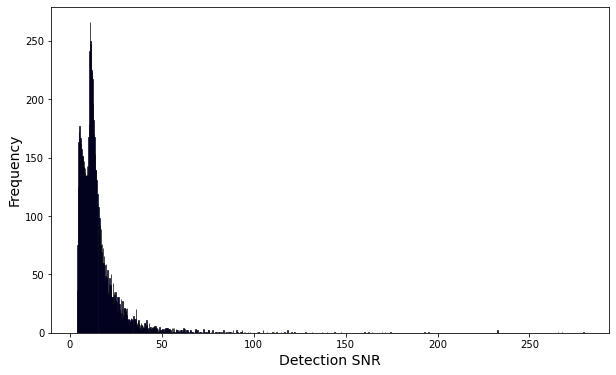

In [20]:
# Define logarithmic bins
# logbins = np.logspace(np.log10(min(snr_values)), np.log10(max(snr_values)), 50)

# Plot the histogram with logarithmic bins
plt.figure(figsize=(10, 6))
plt.hist(snr_values, bins=1000, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Detection SNR', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# plt.xscale('log')
plt.show()

DM with maximum SNR: -100.0502512562814
Width with maximum SNR: 0.01048576 s


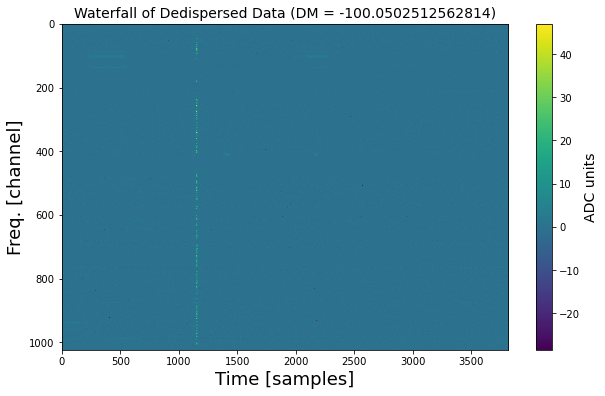

In [22]:
# Find the DM with the maximum SNR
max_snr_index = np.argmax(snr_values)
max_snr_dm = dm_values[max_snr_index]
max_snr_width = width_values[max_snr_index]
print(f"DM with maximum SNR: {max_snr_dm}")
print(f"Width with maximum SNR: {max_snr_width* inj_normalized.header.tsamp} s")

# Dedisperse the data to the DM with the maximum SNR
dedispersed_data = inj_normalized.dedisperse(max_snr_dm)

# Plot the waterfall of the dedispersed data
plot_waterfall(dedispersed_data.data, title=f"Waterfall of Dedispersed Data (DM = {max_snr_dm})")

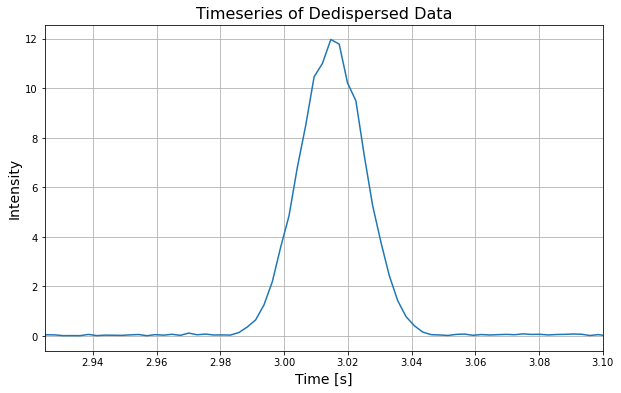

In [23]:
timeseries = get_time_series(dedispersed_data.data, freq_mask=alien_freq_mask, type="mean")

fig = plt.figure(figsize=(10, 6))
time_axis = np.arange(len(timeseries)) * dedispersed_data.header.tsamp
plt.plot(time_axis, np.abs(timeseries))
plt.xlabel('Time [s]', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Timeseries of Dedispersed Data', fontsize=16)
plt.grid()
plt.xlim(2.925, 3.1)
plt.show()

# 4. Search for Alien Signal

## 4.1 Gaussion Search

In [32]:
results = gaussian_fit(aln_normalized, alien_freq_mask, dm_range, width_range)

## 4.2 Maximizing DM and Width

In [34]:
for (dm, width), data in results.items():
    corr = data['corr']
    results[(dm, width)]['max_corr'] = np.max(corr)
    results[(dm, width)]['mean_corr'] = np.mean(corr)
    results[(dm, width)]['median_corr'] = np.median(corr)

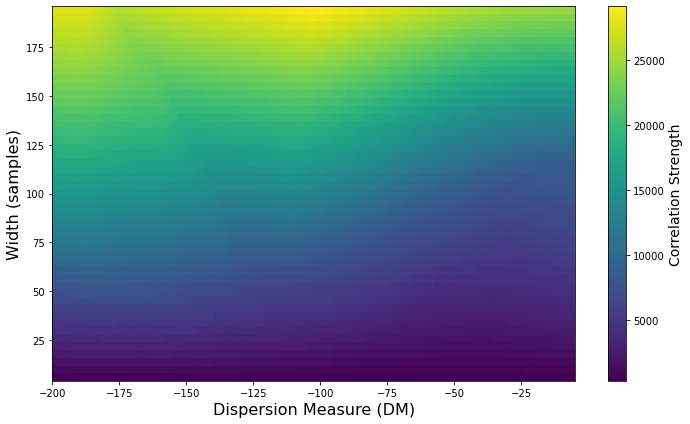

In [48]:
plot_heatmap(results, "median_corr")

## 4.3 Find Candidates

In [35]:
candidates = {}

for (dm, width), data in results.items():
    corr = data['corr']
    max_noise = sky_stats.get((dm, width), {}).get('max_noise', None)
    median_noise = sky_stats.get((dm, width), {}).get('median_noise', None)
    
    if max_noise is not None:
        candidate_indices = np.where(corr > max_noise)[0]
        if len(candidate_indices) > 0:
            candidates[(dm, width)] = {
                'indices': candidate_indices,
                'midtimes': data['midtimes'][candidate_indices],
                'corr_values': corr[candidate_indices],
                'snr': corr[candidate_indices] / median_noise,
            }

print(f"Found {len(candidates)} candidate(s).")

Found 9800 candidate(s).


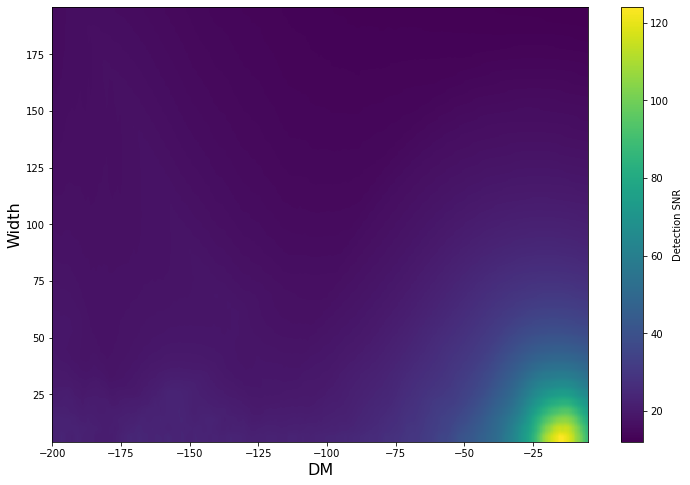

In [36]:
# Extract DM, width, and SNR values from candidates
dm_values = [dm for (dm, width) in candidates.keys()]
width_values = [width for (dm, width) in candidates.keys()]
snr_values = [np.max(data['snr']) for data in candidates.values()]

# Create a pivot table for the heatmap
heatmap_data = pd.DataFrame({'DM': dm_values, 'Width': width_values, 'SNR': snr_values})
heatmap_pivot = heatmap_data.pivot(index='Width', columns='DM', values='SNR')

# Plot the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_pivot, aspect='auto', cmap='viridis', origin='lower', extent=[
    heatmap_pivot.columns.min(), heatmap_pivot.columns.max(),
    heatmap_pivot.index.min(), heatmap_pivot.index.max()
])
plt.colorbar(label='Detection SNR')
# plt.title('Heatmap of SNR for Candidates', fontsize=16)
plt.xlabel('DM', fontsize=16)
plt.ylabel('Width', fontsize=16)
plt.show()

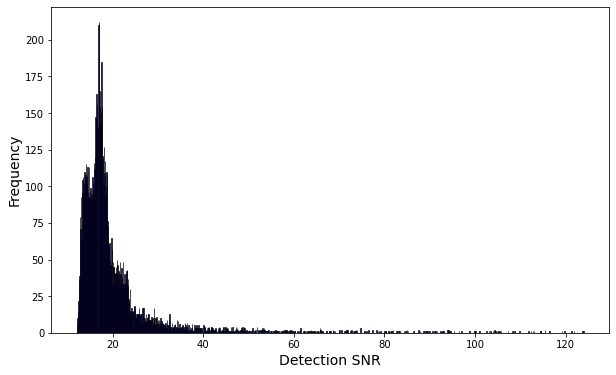

In [37]:
# Define logarithmic bins
logbins = np.logspace(np.log10(min(snr_values)), np.log10(max(snr_values)), 50)

# Plot the histogram with logarithmic bins
plt.figure(figsize=(10, 6))
plt.hist(snr_values, bins=1000, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Detection SNR', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

DM with maximum SNR: -14.798994974874375
Width with maximum SNR: 0.01048576


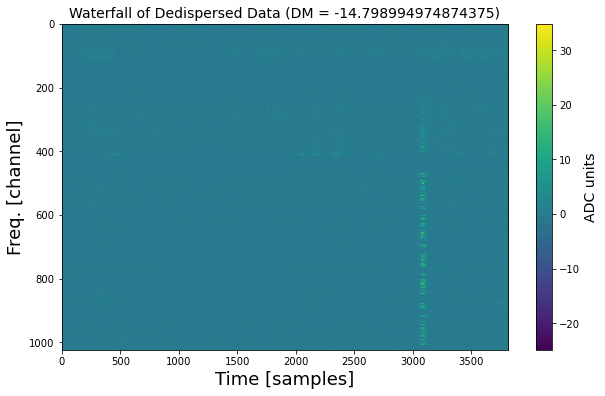

In [38]:
# Find the DM with the maximum SNR
max_snr_index = np.argmax(snr_values)
max_snr_dm = dm_values[max_snr_index]
max_snr_width = width_values[max_snr_index]
print(f"DM with maximum SNR: {max_snr_dm}")
print(f"Width with maximum SNR: {max_snr_width* aln_normalized.header.tsamp}")

# Dedisperse the data to the DM with the maximum SNR
dedispersed_data = aln_normalized.dedisperse(max_snr_dm)

# Plot the waterfall of the dedispersed data
plot_waterfall(dedispersed_data.data, title=f"Waterfall of Dedispersed Data (DM = {max_snr_dm})")

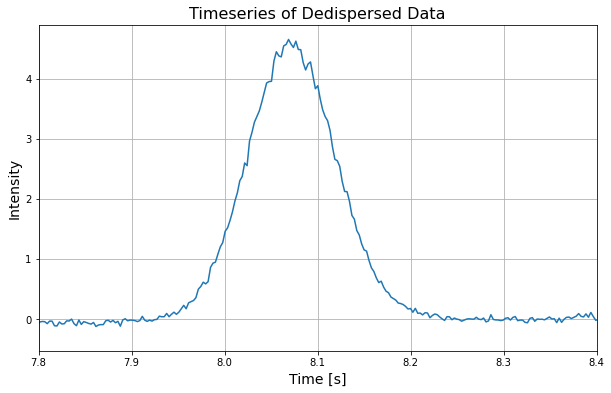

In [39]:
timeseries = get_time_series(dedispersed_data.data, freq_mask=alien_freq_mask, type="mean")

fig = plt.figure(figsize=(10, 6))
time_axis = np.arange(len(timeseries)) * aln_normalized.header.tsamp
plt.plot(time_axis, timeseries)
plt.xlabel('Time [s]', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Timeseries of Dedispersed Data', fontsize=16)
plt.xlim(7.8, 8.4)
plt.grid()
plt.show()

## 4.4 Calibrate

In [40]:
tf = np.load("./data/transfer_function.npz")
transfer_function = tf["transfer_function"]
tf_freq_mask = tf["freq_mask"]

sky_spectrum = np.load("./data/calibrated_sky.npz")["spectrum"]

In [41]:
aln_cal = dedispersed_data.data[tf_freq_mask, :]/ transfer_function[tf_freq_mask][:, np.newaxis]

Peak Flux: 3.807430990561777
Fluence: 0.43316479167780825


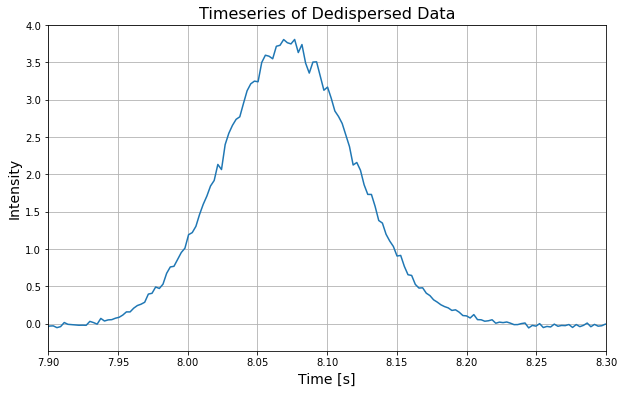

In [42]:
timeseries = get_time_series(aln_cal, freq_mask=None, type="mean")
# timeseries -= np.mean(timeseries)
peak_flux = np.max(timeseries)
fluence = np.sum(timeseries[3000:3150]) * aln_normalized.header.tsamp
print(f"Peak Flux: {peak_flux}")
print(f"Fluence: {fluence}")

fig = plt.figure(figsize=(10, 6))
time_axis = np.arange(len(timeseries)) * aln_normalized.header.tsamp
plt.plot(time_axis, timeseries)
plt.xlabel('Time [s]', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Timeseries of Dedispersed Data', fontsize=16)
plt.xlim(7.9, 8.3)
plt.grid()
plt.show()